In [39]:
import pandas as pd
import scipy.stats as st
from IPython.display import display, Math
from scipy.stats import kstest
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [47]:
sns.set()
# преобразлвание в latex таблицу
def _repr_latex_(self):
    return r'\begin{center}\scalebox{0.7}{%s}\end{center}' % self.to_latex()

pd.set_option('display.notebook_repr_html', True)
pd.DataFrame._repr_latex_ = _repr_latex_

In [48]:
# генерируем выборку
x = np.random.normal(0, 1, 249)
x = sorted(x)
# вычисляем выборочное среднее и стандартное отклонение
x_, sigma = st.norm.fit(x)

table = pd.DataFrame()

# проверка вручную
table['x'] = x
table['i/n'] = [i/len(x) for i in range(1, len(x) + 1)]
table['(i-1)/n'] = [(i-1)/len(x) for i in range(1, len(x) + 1)]
# c параметрами из теоритического распределения
table['F(x)'] = [st.norm.cdf(x[i], x_, sigma) for i in range(len(x))]
table['i/n - F(x)'] = table['i/n'] - table['F(x)']
table['F(x) - (i-1)/n'] = table['F(x)'] - table['(i-1)/n']
# Статистики
D_plus = max(table['i/n - F(x)'])
D_minus = max(table['F(x) - (i-1)/n'])
D_res = max(D_plus, D_minus)
display(Math(r'\text{Cтатистика посчитанная вручную = }' + str(D_res)))
display(Math(r'\text{Cтатистика через kstest = }' + str(kstest(x,'norm', [x_, sigma])[0]))) #<--- проверка kstest
table

<IPython.core.display.Math object>

<IPython.core.display.Math object>

,x,i/n,(i-1)/n,F(x),i/n - F(x),F(x) - (i-1)/n
0,-2.966029,0.004016,0.000000,0.000596,0.003420,0.000596
1,-2.845247,0.008032,0.004016,0.000924,0.007108,-0.003092
2,-2.426599,0.012048,0.008032,0.003768,0.008280,-0.004264
3,-2.347094,0.016064,0.012048,0.004822,0.011242,-0.007226
4,-2.277897,0.020080,0.016064,0.005946,0.014135,-0.010119
5,-2.219741,0.024096,0.020080,0.007063,0.017033,-0.013017
6,-2.039163,0.028112,0.024096,0.011799,0.016313,-0.012297
7,-1.982912,0.032129,0.028112,0.013752,0.018377,-0.014360
8,-1.973968,0.036145,0.032129,0.014087,0.022058,-0.018042
9,-1.800363,0.040161,0.036145,0.022121,0.018040,-0.014024


In [49]:
display(Math(r'\text{p-value = }' + str(kstest(x,'norm', [x_, sigma])[1])))

<IPython.core.display.Math object>

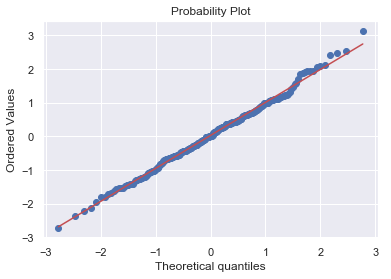

In [46]:
st.probplot(x, dist="norm", plot=plt)
plt.show()

In [50]:
error2 = 0
for i in range(100000):
    x = np.random.standard_cauchy(size=249)
    x_, sigma = st.norm.fit(x)
    if kstest(x, 'norm', [x_, sigma])[1] >= 0.05:
        error2 += 1
        print(x_, sigma)
print('Erorr2 =', error2/100000)

Erorr2 = 0.0


In [51]:
error2 = 0
for i in range(100000):
    x = np.random.standard_cauchy(size=30)
    x_, sigma = st.norm.fit(x)
    if kstest(x, 'norm', [x_, sigma])[1] >= 0.05:
        error2 += 1
print('Erorr2 =', error2/100000)

Erorr2 = 0.27434
